In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd
from root_pandas import read_root

import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split



from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer

from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import seaborn as sns


Welcome to JupyROOT 6.20/04


In [4]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [5]:
#sig_nochunk = read_root('merged_1000_sig.root')
#uu = read_root('merged_1000_uu.root')
#dd = read_root('merged_1000_dd.root')
#ss = read_root('merged_1000_ss.root')
#cc = read_root('merged_1000_cc.root')
#charged = read_root('merged_1000_charged.root')
#mixed = read_root('merged_1000_mixed.root')
#print(sig_nochunk.columns.values) 

In [6]:
ML_columns_tag= [ 
    'Bsig_d0_roeE','Bsig_d0_nROE_ECLClusters_cleanMask',
   'Bsig_d0_R2',
  'Bsig_d0_missingMomentumOfEvent', 
    'Bsig_d0_missingEnergyOfEventCMS', 
    'missingMass2OfEvent', 'roeEextra__bo__bc', #'roeEextra__bocleanMask__bc',
    'Bsig_d0_roeNeextra_cleanMask', 
    'Bsig_d0_nROE_Tracks_cleanMask',
 #'Bsig_d0_nROE_Charged_cleanMask','Bsig_d0_roeP'
    
    'Bsig_d0_roeM', 'Bsig_d0_roeMbc',  'Bsig_d0_nTracks', #'Bsig_d0_nROE_Tracks' ,'Bsig_d0_nROE_Charged',
 #'Bsig_d0_nROE_RemainingTracks', 
    'Bsig_d0_nROE_ECLClusters',
 'Bsig_d0_nROE_KLMClusters', 'Bsig_d0_roeE_cleanMask', 'Bsig_d0_roeM_cleanMask'
    
]
# CS variables are only NaN for tag.

In [7]:
sig_chunk = read_root(
    ['merged_1000_final_sig.root'], columns=ML_columns_tag, chunksize=10000
)
uu_chunk = read_root(
    ['merged_1000_final_uu.root'], columns=ML_columns_tag, chunksize=100000
)
dd_chunk = read_root(
    ['merged_1000_final_dd.root'], columns=ML_columns_tag, chunksize=100000
)
ss_chunk = read_root(
    ['merged_1000_final_ss.root'], columns=ML_columns_tag, chunksize=100000
)
cc_chunk = read_root(
    ['merged_1000_final_cc.root'], columns=ML_columns_tag, chunksize=100000
)
charged_chunk = read_root(
    ['merged_1000_final_charged.root'], columns=ML_columns_tag, chunksize=100000
)
mixed_chunk = read_root(
    ['merged_1000_final_mixed.root'], columns=ML_columns_tag, chunksize=100000
)

In [8]:
sig_list = []
for chunk in sig_chunk: 
    sig_list.append(chunk)
sig = pd.concat(sig_list)  


uu_list = []
for chunk in uu_chunk: 
    uu_list.append(chunk)
uu = pd.concat(uu_list)  

dd_list = []
for chunk in dd_chunk: 
    dd_list.append(chunk)
dd = pd.concat(dd_list)  


ss_list = []
for chunk in ss_chunk: 
    ss_list.append(chunk)
ss = pd.concat(ss_list)  


cc_list = []
for chunk in cc_chunk: 
    cc_list.append(chunk)
cc = pd.concat(cc_list)  


charged_list = []
for chunk in charged_chunk: 
    charged_list.append(chunk)
charged = pd.concat(charged_list)  


mixed_list = []
for chunk in mixed_chunk: 
    mixed_list.append(chunk)
mixed = pd.concat(mixed_list)  

In [9]:
sig

,Bsig_d0_roeE,Bsig_d0_nROE_ECLClusters_cleanMask,Bsig_d0_R2,Bsig_d0_missingMomentumOfEvent,Bsig_d0_missingEnergyOfEventCMS,missingMass2OfEvent,roeEextra__bo__bc,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_roeM,Bsig_d0_roeMbc,Bsig_d0_nTracks,Bsig_d0_nROE_ECLClusters,Bsig_d0_nROE_KLMClusters,Bsig_d0_roeE_cleanMask,Bsig_d0_roeM_cleanMask
0,6.358557,9.0,0.563207,2.930115,3.021027,3.632301,0.719410,0.887408,4.0,6.247812,5.222726,7.0,17.0,3.0,5.391528,5.083504
1,6.126613,13.0,0.104660,2.975803,2.386218,-0.523482,0.934757,1.674774,5.0,5.953862,5.268966,6.0,18.0,3.0,5.988823,5.805401
2,5.697900,11.0,0.473203,1.385900,4.857714,22.407465,0.463583,0.736213,4.0,5.431875,5.271798,6.0,16.0,1.0,4.868545,4.725615
3,5.963901,11.0,0.245621,1.141855,3.584521,9.779428,0.581372,0.677810,7.0,5.752932,5.277680,8.0,19.0,4.0,5.752776,5.509452
4,5.963901,11.0,0.245621,1.141855,3.584521,9.779428,0.754403,0.677810,7.0,5.752932,5.277680,8.0,19.0,4.0,5.752776,5.509452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,5.892645,10.0,0.243777,2.081023,3.230342,6.966573,0.552747,1.239320,5.0,5.708188,5.286593,6.0,14.0,2.0,5.792819,5.587330
4830,6.201603,12.0,0.146645,1.761496,2.620205,1.946631,0.942032,0.856356,6.0,5.982388,5.273794,8.0,20.0,1.0,5.707798,5.492718
4831,6.052079,12.0,0.257433,2.259987,2.601810,0.364646,0.625702,3.321640,2.0,5.866240,5.280979,4.0,19.0,3.0,5.581100,5.296446
4832,6.052079,12.0,0.257433,2.259987,2.601810,0.364646,0.527600,3.321640,2.0,5.866240,5.280979,4.0,19.0,3.0,5.581100,5.296446


In [10]:
frames = [uu, dd, ss, cc, charged, mixed]
bkg = pd.concat(frames, keys=['uu', 'dd', 'ss', 'cc', 'charged', 'mixed'])

In [11]:
bkg

Bsig_d0_roeE  Bsig_d0_nROE_ECLClusters_cleanMask  Bsig_d0_R2  \
uu    0           9.561552                                14.0    0.388749   
      1          10.681120                                19.0    0.347812   
      2          10.681120                                19.0    0.347812   
      3          10.681120                                19.0    0.347812   
      4          10.681120                                19.0    0.347812   
...                    ...                                 ...         ...   
mixed 930526     12.563967                                24.0    0.032221   
      930527     10.674512                                17.0    0.110761   
      930528     11.371692                                23.0    0.212316   
      930529     11.371692                                23.0    0.212316   
      930530     11.577931                                23.0    0.212316   

              Bsig_d0_missingMomentumOfEvent  Bsig_d0_missingEnergyOfEventCMS  \
uu    0                             1.012900                         0.375174   
      1                             0.105669                        -0.117634   
      2                             0.105669                        -0.117634   
      3                             0.105669                        -0.117634   
      4                             0.105669                        -0.117634   
...                                      ...                              ...   
mixed 930526                        1.087867                        -0.371779   
      930527                        0.677393                         0.843130   
      930528                        0.528573                         0.352843   
      930529                        0.528573                         0.352843   
      930530                        0.528573                         0.352843   

              missingMass2OfEvent  roeEextra__bo__bc  \
uu    0                 -0.673675           2.405871   
      1                 -0.000126           2.606894   
      2                 -0.000126           2.606894   
      3                 -0.000126           2.802900   
      4                 -0.000126           2.867405   
...                           ...                ...   
mixed 930526            -0.797302           4.567032   
      930527             0.399554           5.049945   
      930528            -0.202600           3.090240   
      930529            -0.202600           3.045901   
      930530            -0.202600           3.242040   

              Bsig_d0_roeNeextra_cleanMask  Bsig_d0_nROE_Tracks_cleanMask  \
uu    0                           3.330882                            6.0   
      1                           3.549072                            8.0   
      2                           3.549072                            8.0   
      3                           3.549072                            8.0   
      4                           3.549072                            8.0   
...                                    ...                            ...   
mixed 930526                      3.978063                            7.0   
      930527                      6.409268                            5.0   
      930528                      3.550675                            9.0   
      930529                      3.550675                            9.0   
      930530                      3.550675                            9.0   

              Bsig_d0_roeM  Bsig_d0_roeMbc  Bsig_d0_nTracks  \
uu    0           9.120434        5.105020              7.0   
      1          10.293244        5.120382             10.0   
      2          10.293244        5.120382             10.0   
      3          10.293244        5.120382             10.0   
      4          10.293244        5.120382             10.0   
...                    ...             ...              ...   
mixed 930526     11.974881        5.241146             15.0   
  

In [12]:
## Use only fraction of data frame 
# https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes

shuffled = sig.sample(frac=1)   # shuffle the rows of dataframe 
sig_frac = np.array_split(shuffled, 10)  # split it into n dataframes
sig_frac[0]  # choose first array with 0

,Bsig_d0_roeE,Bsig_d0_nROE_ECLClusters_cleanMask,Bsig_d0_R2,Bsig_d0_missingMomentumOfEvent,Bsig_d0_missingEnergyOfEventCMS,missingMass2OfEvent,roeEextra__bo__bc,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_roeM,Bsig_d0_roeMbc,Bsig_d0_nTracks,Bsig_d0_nROE_ECLClusters,Bsig_d0_nROE_KLMClusters,Bsig_d0_roeE_cleanMask,Bsig_d0_roeM_cleanMask
3262,6.267536,11.0,0.356039,0.396885,3.548818,11.453953,0.630508,1.065388,5.0,6.061882,5.256691,7.0,16.0,1.0,5.974805,5.736177
2594,6.379648,10.0,0.060302,0.675246,3.975204,15.094608,1.116472,1.776373,5.0,6.130783,5.270132,8.0,19.0,4.0,5.312704,5.157479
169,7.658933,13.0,0.076480,1.250505,4.591392,20.442732,1.656053,1.853656,6.0,7.326595,5.285731,10.0,20.0,1.0,6.447941,6.044726
2505,5.941083,11.0,0.327666,1.567057,4.405888,18.028337,0.793241,2.235347,4.0,5.709357,5.283228,6.0,16.0,1.0,5.593361,5.359331
647,6.037332,6.0,0.211898,1.932396,3.781074,9.333348,0.320226,1.587764,4.0,5.654823,5.244513,7.0,10.0,3.0,5.177004,4.910839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,6.015611,12.0,0.553335,1.724485,3.960768,14.309669,0.591653,0.617377,6.0,5.847096,5.259177,8.0,17.0,0.0,5.588080,5.402188
2042,6.229784,12.0,0.406470,1.836042,4.010885,14.491319,0.902446,1.547759,3.0,6.165559,5.205166,4.0,22.0,2.0,5.928683,5.826230
3312,6.016628,9.0,0.244554,2.109284,3.246042,5.816343,0.722069,2.045837,5.0,5.915469,5.247445,6.0,27.0,2.0,5.567627,5.406141
2424,6.078439,10.0,0.289897,2.841067,2.854068,1.283253,0.604623,0.674660,3.0,5.841346,5.275199,4.0,15.0,2.0,5.927277,5.666288


In [13]:

shuffled = bkg.sample(frac=1) # shuffle the rows of dataframe 
bkg_frac = np.array_split(shuffled, 10)  # split it into n dataframes
bkg_frac[0] # choose first array with 0

Bsig_d0_roeE  Bsig_d0_nROE_ECLClusters_cleanMask  Bsig_d0_R2  \
ss      58167       10.246406                                20.0    0.374279   
cc      328151       8.763100                                14.0    0.429971   
        366418      12.237735                                15.0    0.347378   
ss      60210        8.763177                                15.0    0.355783   
cc      507629      10.941413                                26.0    0.307456   
...                       ...                                 ...         ...   
charged 278170      11.051781                                17.0    0.075619   
mixed   679610      11.109172                                20.0    0.147797   
cc      898927      11.248759                                17.0    0.378147   
        916213       9.908942                                26.0    0.190839   
        1737182     10.338809                                16.0    0.535415   

                 Bsig_d0_missingMomentumOfEvent  \
ss      58167                          0.752442   
cc      328151                         1.118450   
        366418                         1.124940   
ss      60210                          4.677200   
cc      507629                         1.265785   
...                                         ...   
charged 278170                         0.261292   
mixed   679610                         0.468952   
cc      898927                         0.204062   
        916213                         0.617292   
        1737182                        0.762626   

                 Bsig_d0_missingEnergyOfEventCMS  missingMass2OfEvent  \
ss      58167                           1.112251             0.607196   
cc      328151                          2.125505             2.924758   
        366418                          2.636080             6.775450   
ss      60210                           3.334002            -4.825873   
cc      507629                          1.396358             1.154574   
...                                          ...                  ...   
charged 278170                          0.215796            -0.026022   
mixed   679610                         -0.032469            -0.218553   
cc      898927                          0.760952             0.557191   
        916213                          0.457939            -0.032287   
        1737182                         0.389724            -0.317440   

                 roeEextra__bo__bc  Bsig_d0_roeNeextra_cleanMask  \
ss      58167             2.576825                      2.406700   
cc      328151            2.861875                      1.358243   
        366418            3.697146                      2.962552   
ss      60210             1.719876                      1.585313   
cc      507629            3.661453                      2.884119   
...                            ...                           ...   
charged 278170            3.509554                      2.998547   
mixed   679610            2.976064                      2.473840   
cc      898927            3.146818                      3.761538   
        916213            3.439112                      4.395317   
        1737182           3.170354                      1.827786   

                 Bsig_d0_nROE_Tracks_cleanMask  Bsig_d0_roeM  Bsig_d0_roeMbc  \
ss      58167                              8.0     10.123867        5.043397   
cc      328151                             8.0      8.396763        5.277744   
        366418                             9.0     12.217583        4.487588   
ss      60210                              7.0      8.550567        4.537723   
cc      507629                            11.0     10.701732        5.190967   
...                                        ...           ...             ...   
charged 278170                            10.0     10.658260        5.260143   
mixed   679610                             8.0     10.864177        5.189779   
cc      898927   

In [14]:
sig_drop = sig_frac[0].dropna() 
bkg_drop = bkg_frac[0].dropna()
bkg_drop

Bsig_d0_roeE  Bsig_d0_nROE_ECLClusters_cleanMask  Bsig_d0_R2  \
ss      58167       10.246406                                20.0    0.374279   
cc      328151       8.763100                                14.0    0.429971   
        366418      12.237735                                15.0    0.347378   
ss      60210        8.763177                                15.0    0.355783   
cc      507629      10.941413                                26.0    0.307456   
...                       ...                                 ...         ...   
charged 278170      11.051781                                17.0    0.075619   
mixed   679610      11.109172                                20.0    0.147797   
cc      898927      11.248759                                17.0    0.378147   
        916213       9.908942                                26.0    0.190839   
        1737182     10.338809                                16.0    0.535415   

                 Bsig_d0_missingMomentumOfEvent  \
ss      58167                          0.752442   
cc      328151                         1.118450   
        366418                         1.124940   
ss      60210                          4.677200   
cc      507629                         1.265785   
...                                         ...   
charged 278170                         0.261292   
mixed   679610                         0.468952   
cc      898927                         0.204062   
        916213                         0.617292   
        1737182                        0.762626   

                 Bsig_d0_missingEnergyOfEventCMS  missingMass2OfEvent  \
ss      58167                           1.112251             0.607196   
cc      328151                          2.125505             2.924758   
        366418                          2.636080             6.775450   
ss      60210                           3.334002            -4.825873   
cc      507629                          1.396358             1.154574   
...                                          ...                  ...   
charged 278170                          0.215796            -0.026022   
mixed   679610                         -0.032469            -0.218553   
cc      898927                          0.760952             0.557191   
        916213                          0.457939            -0.032287   
        1737182                         0.389724            -0.317440   

                 roeEextra__bo__bc  Bsig_d0_roeNeextra_cleanMask  \
ss      58167             2.576825                      2.406700   
cc      328151            2.861875                      1.358243   
        366418            3.697146                      2.962552   
ss      60210             1.719876                      1.585313   
cc      507629            3.661453                      2.884119   
...                            ...                           ...   
charged 278170            3.509554                      2.998547   
mixed   679610            2.976064                      2.473840   
cc      898927            3.146818                      3.761538   
        916213            3.439112                      4.395317   
        1737182           3.170354                      1.827786   

                 Bsig_d0_nROE_Tracks_cleanMask  Bsig_d0_roeM  Bsig_d0_roeMbc  \
ss      58167                              8.0     10.123867        5.043397   
cc      328151                             8.0      8.396763        5.277744   
        366418                             9.0     12.217583        4.487588   
ss      60210                              7.0      8.550567        4.537723   
cc      507629                            11.0     10.701732        5.190967   
...                                        ...           ...             ...   
charged 278170                            10.0     10.658260        5.260143   
mixed   679610                             8.0     10.864177        5.189779   
cc      898927   

In [15]:
frames_all = [sig, uu, dd, ss, cc, charged, mixed]
all_com = pd.concat(frames_all, keys=['sig', 'uu', 'dd', 'ss', 'cc', 'charged', 'mixed'])

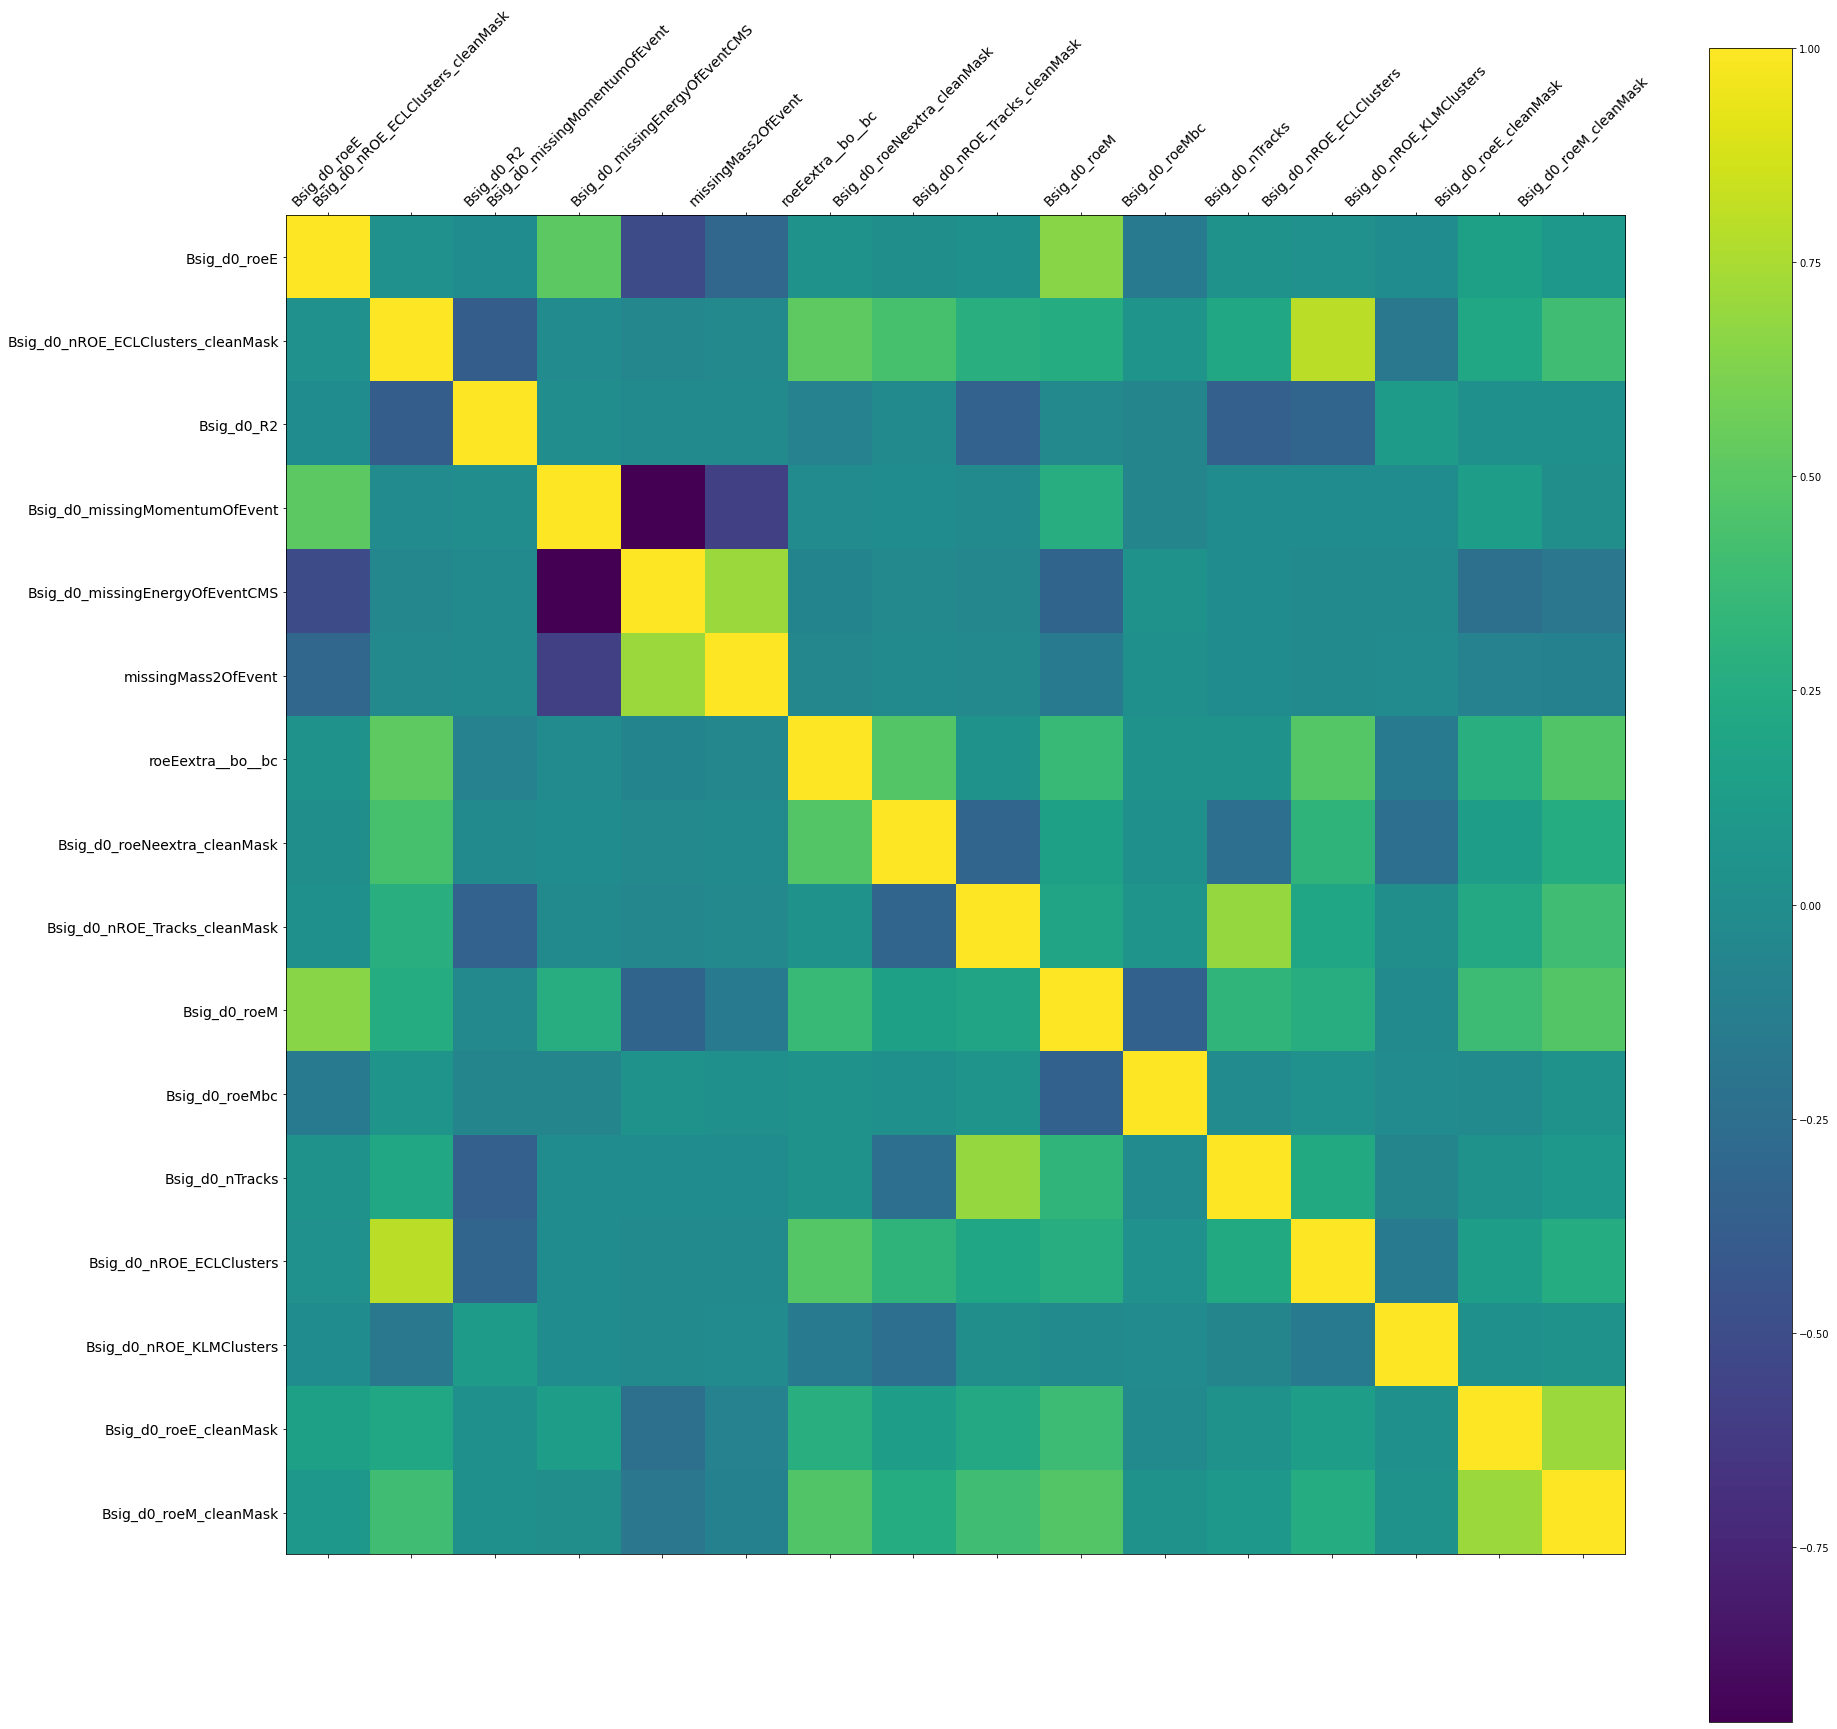

In [16]:
f = plt.figure(figsize=(30, 30))
plt.matshow(all_com.corr(), fignum=f.number)
plt.xticks(range(all_com.select_dtypes(['number']).shape[1]), all_com.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(all_com.select_dtypes(['number']).shape[1]), all_com.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix', fontsize=16);

In [73]:
sig_drop

,Bsig_d0_roeE,Bsig_d0_nROE_ECLClusters_cleanMask,Bsig_d0_R2,Bsig_d0_missingMomentumOfEvent,Bsig_d0_missingEnergyOfEventCMS,missingMass2OfEvent,roeEextra__bo__bc,roeEextra__bocleanMask__bc,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_roeM,Bsig_d0_roeP,Bsig_d0_roeMbc,Bsig_d0_nTracks,Bsig_d0_nROE_Tracks,Bsig_d0_nROE_Charged,Bsig_d0_nROE_KLMClusters,Bsig_d0_roeE_cleanMask,Bsig_d0_roeM_cleanMask
4011,5.899494,11.0,0.300454,1.452824,2.957932,4.959476,0.589093,0.441010,0.711189,5.0,5.0,5.806128,1.045426,5.246448,6.0,5.0,5.0,3.0,5.751412,5.640606
4162,5.826703,12.0,0.134734,0.750990,3.878779,12.034666,1.048818,0.884255,0.884255,7.0,7.0,5.525966,1.847748,5.256423,10.0,9.0,9.0,2.0,5.019548,4.807517
1208,5.703592,11.0,0.141780,1.916115,3.693716,10.619060,0.624358,0.506885,0.974730,6.0,6.0,5.517312,1.445759,5.285913,8.0,7.0,7.0,1.0,5.139939,4.803268
3432,5.797521,11.0,0.305719,1.337567,4.277118,17.275316,0.356106,0.261916,1.753486,5.0,5.0,5.559458,1.644288,5.275660,8.0,7.0,7.0,3.0,5.168498,4.867487
4564,5.762149,10.0,0.315390,2.820593,3.180121,5.525228,0.535901,0.318061,1.028027,5.0,5.0,5.522337,1.645039,5.275972,6.0,5.0,5.0,0.0,5.544309,5.279670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,6.054669,10.0,0.026273,2.234130,3.833721,13.180912,0.808346,0.738458,0.738458,7.0,7.0,5.930525,1.219791,5.252789,8.0,7.0,7.0,2.0,5.984781,5.848207
692,6.280488,12.0,0.315312,0.844505,3.446055,9.604877,0.919743,0.755863,2.357771,5.0,5.0,5.964594,1.966763,5.266703,6.0,5.0,5.0,2.0,6.116608,5.790223
113,6.084797,8.0,0.363125,1.494908,4.847614,23.163828,0.466952,0.250095,2.365008,3.0,3.0,5.794182,1.858012,5.274357,5.0,4.0,4.0,0.0,5.750473,5.511700
258,10.122866,13.0,0.112013,1.978671,2.787001,1.878700,2.832870,0.616547,2.159744,5.0,5.0,8.880237,4.859404,4.487522,7.0,6.0,6.0,3.0,6.045089,5.893280


In [74]:
list_values =  sig_drop.values.tolist()
list_values_bkg =  bkg_drop.values.tolist()

#add bkg in sig list_values
list_values.extend(list_values_bkg)


In [75]:
len(sig_drop)

484

In [76]:
sig_can = len(sig_drop)
sig_can
# it should not be too low for making importance plot.

484

In [77]:
bkg_can = len(bkg_drop)
bkg_can

530761

In [78]:

label = []
#label signal: 49696
for i in range(sig_can):
    label.append(1)

    
for i in range(bkg_can):
    label.append(0)
    

In [79]:
len(label)

531245

In [80]:
len(list_values)

531245

In [81]:
list_values_train, list_values_test, label_train, label_test = train_test_split(list_values, label, test_size=0.25)


In [82]:
##########################################################################
# SVM fit
clf_initial = SVC()   # should be svm.SVC()?
clf_initial.fit(list_values_train, label_train)   
label_score = clf_initial.fit(list_values_train, label_train).decision_function(list_values_test)

In [83]:
clf_initial.get_params()
 #{'C': 1.0,
 #'break_ties': False,
 #'cache_size': 200,
 #'class_weight': None,
 #'coef0': 0.0,
 #'decision_function_shape': 'ovr',
 #'degree': 3,
 #'gamma': 'scale',
 #'kernel': 'rbf',
 #'max_iter': -1,
 #'probability': False,
 #'random_state': None,
 #'shrinking': True,
 #'tol': 0.001,
 #'verbose': False}

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [84]:
##############################################################################################################
# AUC score from prediction scpre:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

roc_auc_score(label_train, clf_initial.decision_function(list_values_train))
#0.9961601363447251

0.9977411760586794

In [85]:
score = clf_initial.score(list_values_train, label_train)
score
#.9995400894931149

# score and AUC score are different!!

0.9993022666295212

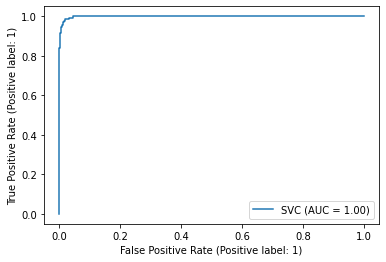

In [86]:
plot_roc_curve(clf_initial, list_values_test, label_test)

<Figure size 432x288 with 0 Axes>

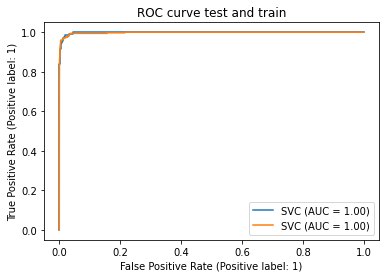

In [87]:
# Combilne multiple ROC curves
# https://www.youtube.com/watch?v=Vc-qn5VcJmw&t=25s
plt.figure()
test_roc = plot_roc_curve(clf_initial, list_values_test, label_test)
plot_roc_curve(clf_initial, list_values_train, label_train, ax=test_roc.ax_);
plt.title('ROC curve test and train')
plt.show() 


In [88]:
label_score.shape
#(1328520,)

(132812,)

In [89]:
label_score
#array([-4.40926997, -6.19161143, -5.31994299, ..., -3.49443269,
    #   -3.94563064, -4.64976888])

array([-2.84244083, -2.87625853, -2.56952812, ..., -3.01472919,
       -2.4425865 , -3.50125175])

In [90]:
clf_initial.score(list_values_train, label_train)
#0.9995400894931149

0.9993022666295212

In [91]:
############################################################################################
############################################################################################
# Permutation feature importance
#https://scikit-learn.org/stable/modules/permutation_importance.html

In [92]:
#r = permutation_importance(clf_initial, list_values_test, label_test,
#                           n_repeats=30,
#                            random_state=0)
#r

In [93]:
#r.importances_mean

In [94]:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
#sorted_idx = r.importances_mean.argsort()
#sorted_idx

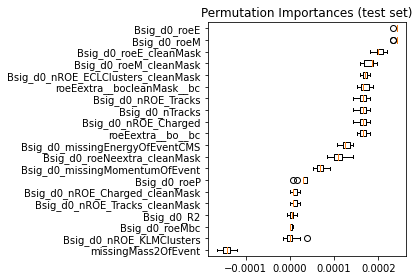

In [95]:
#df_list_values_test = pd.DataFrame(list_values_test, columns =ML_columns_tag)
#df_list_values_test

# feature of importance in test set

r_test = permutation_importance(
    clf_initial, list_values_test, label_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = r_test.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    r_test.importances[sorted_idx].T, vert=False, labels=sig_drop.columns[sorted_idx]
)

ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

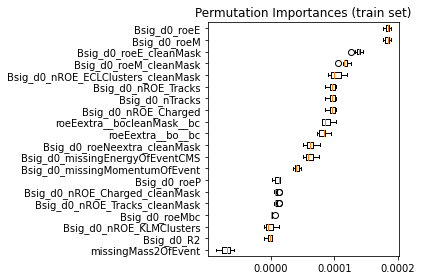

In [96]:

# feature of importance in train set
r_train = permutation_importance(
    clf_initial, list_values_train, label_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_idx2 = r_train.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    r_train.importances[sorted_idx2].T, vert=False, labels=sig_drop.columns[sorted_idx2]
)

ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()